# CSE - Vishnu Pulipaka - 221710302064

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Make predictions on test data and calculate the precision, recall and f1-score.


### updated in the worklog folder

## Find the frequency of categories in the CLMSEX column and plot a graph. Write the observations which category people are more.


In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/claimants.csv")
df.head(3)

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330


In [47]:
def fill_na(col):
    col.fillna(col.value_counts().index[0],inplace=True)
    return col
df.apply(lambda col:fill_na(col))

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,10.0,0.576
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


In [48]:
df.isnull().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [49]:
df.drop(columns=['CASENUM'],axis=1,inplace=True)
df.shape

KeyError: "['CASENUM'] not found in axis"

In [50]:
df.CLMSEX.value_counts()

1.0    754
0.0    586
Name: CLMSEX, dtype: int64

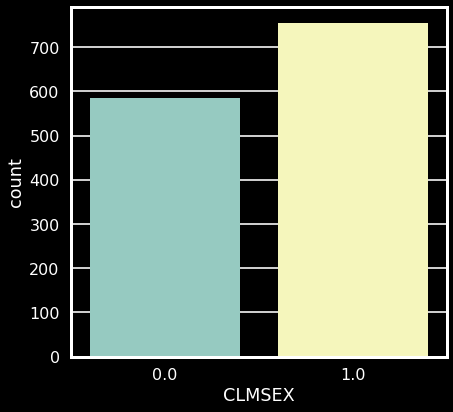

In [55]:
plt.figure(figsize=(6,6))
sns.countplot(df.CLMSEX)

### Category 1 people are more : i.e male

## Plot the visualizations of the column CLMAGE and find the pattern in the data like which age group people were more as claimants 

In [52]:
df.CLMAGE.describe()

count    1340.000000
mean       25.817164
std        19.879401
min         0.000000
25%        10.000000
50%        17.000000
75%        40.000000
max        95.000000
Name: CLMAGE, dtype: float64

(array([723., 235., 302.,  70.,  10.]),
 array([  0,  20,  40,  60,  80, 100]),
 <a list of 5 Patch objects>)

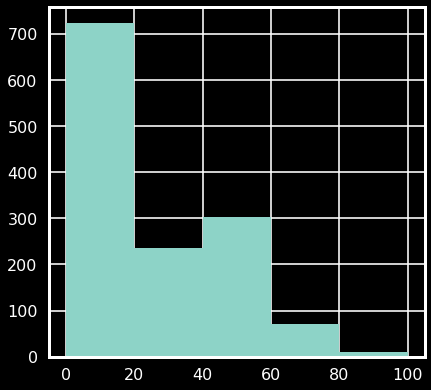

In [54]:
plt.figure(figsize=(6,6))
plt.hist(df.CLMAGE,bins=[0,20,40,60,80,100])

### Observations: 
- max people belong to age group [0-20]

## Visualize how many claimants are going to hire an attorney with respect to CLMSEX i.e., out of male claimants how many will hire an attorney; out of female how many will hire an attorney

In [17]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

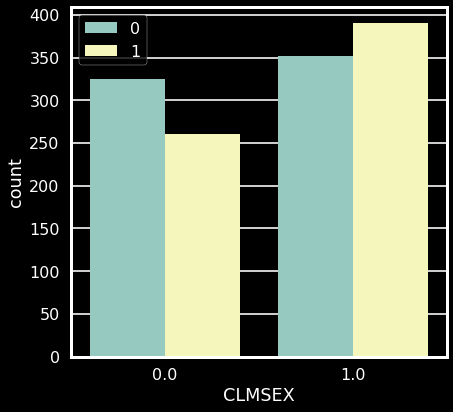

In [29]:
plt.style.use('dark_background')
plt.figure(figsize=(6,6))
sns.countplot(df.CLMSEX,hue=df.ATTORNEY)
plt.legend(loc='best')

#### More percentage among people who hire attorney are male
#### 390/732 males hire attorney
#### around 261 of females hire attorney

In [56]:
df[(df.CLMSEX==1) & (df.ATTORNEY==1) ].shape[0]      # male and attorney

394

In [57]:
df[(df.CLMSEX==0) & (df.ATTORNEY==1) ].shape[0]      # female and attorney

261

## Check the correlation of the dataset and visualize it through heatmap

In [58]:
df.corr()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
ATTORNEY,1.000000,0.076564,0.076631,-0.055848,-0.016396,-0.219715
CLMSEX,0.076564,1.000000,0.065976,-0.016327,-0.013789,-0.028412
CLMINSUR,0.076631,0.065976,1.000000,0.019953,0.030389,0.004641
SEATBELT,-0.055848,-0.016327,0.019953,1.000000,-0.018020,0.111879
CLMAGE,-0.016396,-0.013789,0.030389,-0.018020,1.000000,0.051575
LOSS,-0.219715,-0.028412,0.004641,0.111879,0.051575,1.000000


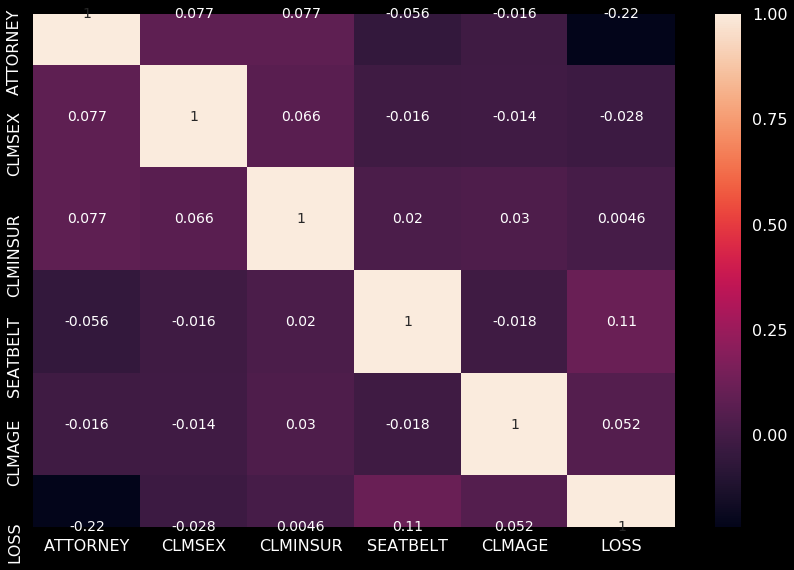

In [59]:
sns.heatmap(df.corr(),annot=True)

#### no input columns have high inter correlation

## Calculate the number people who did not wear SEATBELT, what is their percentage of hiring attorney 

In [60]:
num=df[(df.SEATBELT==0) & (df.ATTORNEY==1)].shape[0]
den=df.shape[0]
(num/den)*100

48.43283582089552